In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset for 'passenger data.csv'

df1 = pd.read_csv('Medical Retail Final CSV.csv')

In [3]:
df1.head()

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,"22,035",-,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,"3,926","4,099",No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,"8,031",-,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,"8,046",-,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,"8,046",-,No,4,18-11-2021,00-01-1900,NO EMAIL,blank


In [4]:
df1.shape

(65968, 10)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65968 entries, 0 to 65967
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer id             65968 non-null  int64 
 1   App User                65968 non-null  int64 
 2   Covid19 Medicine Sales  65968 non-null  object
 3   Other Medicine Sales    65968 non-null  object
 4   Redeemed points Flag    65968 non-null  object
 5   Transactions            65968 non-null  int64 
 6   last transaction date   65968 non-null  object
 7   DOB                     65968 non-null  object
 8   EMAIL Flag              65968 non-null  object
 9   Gender                  65968 non-null  object
dtypes: int64(3), object(7)
memory usage: 5.0+ MB


In [6]:
df1.describe(include='all')



,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
count,6.596800e+04,65968.000000,65968,65968,65968,65968.000000,65968,65968,65968,65968
unique,NaN,NaN,10266,12707,2,NaN,440,2101,2,3
top,NaN,NaN,-,-,No,NaN,27-11-2021,00-01-1900,NO EMAIL,blank
freq,NaN,NaN,5749,28892,65807,NaN,1675,63610,37203,48297
mean,4.581555e+08,0.251031,NaN,NaN,NaN,3.505866,NaN,NaN,NaN,NaN
std,3.041646e+08,0.433609,NaN,NaN,NaN,3.909522,NaN,NaN,NaN,NaN
min,8.946000e+03,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,1.750585e+08,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
50%,4.507221e+08,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
75%,7.231109e+08,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


**Deal with missing value**

In [7]:
# Returns the number of missing values in each column of the DataFrame.
df1.isnull().sum()

Customer id               0
App User                  0
Covid19 Medicine Sales    0
Other Medicine Sales      0
Redeemed points Flag      0
Transactions              0
last transaction date     0
DOB                       0
EMAIL Flag                0
Gender                    0
dtype: int64

In [8]:
# Returns the Percent of missing values in each column of the DataFrame.
round((df1.isnull().sum()/len(df1))*100,2)

Customer id               0.0
App User                  0.0
Covid19 Medicine Sales    0.0
Other Medicine Sales      0.0
Redeemed points Flag      0.0
Transactions              0.0
last transaction date     0.0
DOB                       0.0
EMAIL Flag                0.0
Gender                    0.0
dtype: float64

In [9]:
# drop duplicate rows
df1.drop_duplicates(inplace=True)

In [10]:
# drop duplicate columns
df1.T.drop_duplicates().T

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,"22,035",-,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,"3,926","4,099",No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,"8,031",-,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,"8,046",-,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,"8,046",-,No,4,18-11-2021,00-01-1900,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,-,"11,14,341",No,1,12-09-2021,00-01-1900,EMAIL PRESENT,blank
65964,682210238,0,-,"12,49,095",No,1,19-11-2021,00-01-1900,NO EMAIL,blank
65965,645430745,0,-,"14,96,487",No,1,06-09-2021,00-01-1900,NO EMAIL,blank
65966,893585748,0,-,"17,13,370",No,1,27-09-2021,00-01-1900,NO EMAIL,blank


In [11]:
df1

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,"22,035",-,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,"3,926","4,099",No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,"8,031",-,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,"8,046",-,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,"8,046",-,No,4,18-11-2021,00-01-1900,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,-,"11,14,341",No,1,12-09-2021,00-01-1900,EMAIL PRESENT,blank
65964,682210238,0,-,"12,49,095",No,1,19-11-2021,00-01-1900,NO EMAIL,blank
65965,645430745,0,-,"14,96,487",No,1,06-09-2021,00-01-1900,NO EMAIL,blank
65966,893585748,0,-,"17,13,370",No,1,27-09-2021,00-01-1900,NO EMAIL,blank


In [12]:
df1.nunique()

Customer id               65967
App User                      2
Covid19 Medicine Sales    10266
Other Medicine Sales      12707
Redeemed points Flag          2
Transactions                 71
last transaction date       440
DOB                        2101
EMAIL Flag                    2
Gender                        3
dtype: int64

**Univariant Analysis**

In [13]:
#1 -	Prepare histogram and boxplots of continuous data to show the extent of data spread, 
#       identify outliers and data skewness 

# convert 'values' column to integer and remove '-' character
df1['Covid19 Medicine Sales'] = df1['Covid19 Medicine Sales'].apply(lambda x: int(x.replace(',', '')) if x != ' -   ' else None)


In [14]:
df1

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035.0,-,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,3926.0,"4,099",No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,8031.0,-,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,8046.0,-,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,8046.0,-,No,4,18-11-2021,00-01-1900,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,NaN,"11,14,341",No,1,12-09-2021,00-01-1900,EMAIL PRESENT,blank
65964,682210238,0,NaN,"12,49,095",No,1,19-11-2021,00-01-1900,NO EMAIL,blank
65965,645430745,0,NaN,"14,96,487",No,1,06-09-2021,00-01-1900,NO EMAIL,blank
65966,893585748,0,NaN,"17,13,370",No,1,27-09-2021,00-01-1900,NO EMAIL,blank


In [15]:
df1['Covid19 Medicine Sales'] = df1['Covid19 Medicine Sales'].fillna(0).astype(int)

In [16]:
df1

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035,-,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,3926,"4,099",No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,8031,-,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,8046,-,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,8046,-,No,4,18-11-2021,00-01-1900,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,0,"11,14,341",No,1,12-09-2021,00-01-1900,EMAIL PRESENT,blank
65964,682210238,0,0,"12,49,095",No,1,19-11-2021,00-01-1900,NO EMAIL,blank
65965,645430745,0,0,"14,96,487",No,1,06-09-2021,00-01-1900,NO EMAIL,blank
65966,893585748,0,0,"17,13,370",No,1,27-09-2021,00-01-1900,NO EMAIL,blank


In [17]:
df1['last transaction date'] =pd.to_datetime(df1['last transaction date'])

In [18]:
df1['Other Medicine Sales '] = df1['Other Medicine Sales '].apply(lambda x: int(x.replace(',', '')) if x != ' -   ' else None)


In [19]:
df1['Other Medicine Sales '] = df1['Other Medicine Sales '].fillna(0).astype(int)


In [20]:
df1['DOB'] = pd.to_datetime(df1['DOB'], format='%d-%m-%Y', errors='coerce')

In [21]:
df1

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank
65966,893585748,0,0,1713370,No,1,2021-09-27,NaT,NO EMAIL,blank


In [22]:
df1.dtypes

Customer id                        int64
App User                           int64
Covid19 Medicine Sales             int32
Other Medicine Sales               int32
Redeemed points Flag              object
Transactions                       int64
last transaction date     datetime64[ns]
DOB                       datetime64[ns]
EMAIL Flag                        object
Gender                            object
dtype: object

In [23]:
df1.describe()

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Transactions
count,6.596800e+04,65968.000000,6.596800e+04,6.596800e+04,65968.000000
mean,4.581555e+08,0.251031,2.039726e+04,6.891090e+04,3.505866
std,3.041646e+08,0.433609,3.885862e+04,2.569398e+05,3.909522
min,8.946000e+03,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,1.750585e+08,0.000000,7.157000e+03,0.000000e+00,2.000000
50%,4.507221e+08,0.000000,1.333800e+04,8.892000e+03,2.000000
75%,7.231109e+08,1.000000,2.403100e+04,5.732475e+04,4.000000
max,1.161100e+09,1.000000,5.146615e+06,2.889398e+07,268.000000


In [24]:
# customer details that has each transaction value of more then 2,000. 

df1 = df1[(df1["Covid19 Medicine Sales"] >= 2000) | (df1["Other Medicine Sales "] >= 2000)]

In [25]:
df1

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank
65966,893585748,0,0,1713370,No,1,2021-09-27,NaT,NO EMAIL,blank


In [26]:
df1.nunique()

Customer id               65967
App User                      2
Covid19 Medicine Sales    10265
Other Medicine Sales      12706
Redeemed points Flag          2
Transactions                 71
last transaction date       440
DOB                        2100
EMAIL Flag                    2
Gender                        3
dtype: int64

## Univariate analysis of Data:  

### Q1 Prepare histogram and boxplots of continuous data to show the extent of data spread, identify outliers and data skewness 

count    6.596800e+04
mean     2.039726e+04
std      3.885862e+04
min      0.000000e+00
25%      7.157000e+03
50%      1.333800e+04
75%      2.403100e+04
max      5.146615e+06
Name: Covid19 Medicine Sales, dtype: float64

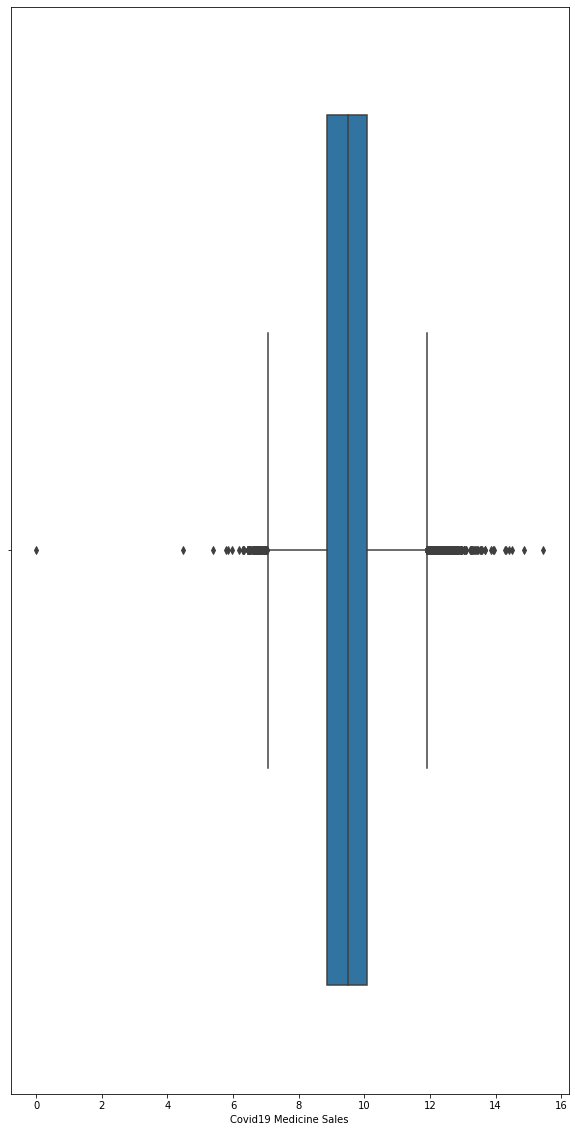

In [27]:
# Create the boxplot for 'Covid19 Medicine Sales'
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,20))
sns.boxplot(x=np.log(df1["Covid19 Medicine Sales"]))
df1['Covid19 Medicine Sales'].describe()


count    6.596800e+04
mean     2.039726e+04
std      3.885862e+04
min      0.000000e+00
25%      7.157000e+03
50%      1.333800e+04
75%      2.403100e+04
max      5.146615e+06
Name: Covid19 Medicine Sales, dtype: float64

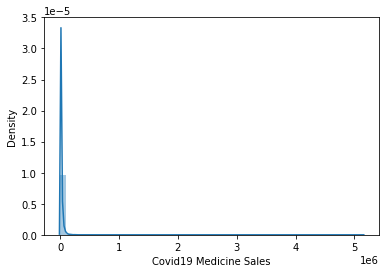

In [28]:
# continuous data to show the extent of data skewness 
sns.distplot(df1['Covid19 Medicine Sales'],kde=True)

# describe only column 'Covid19 Medicine Sales'
df1['Covid19 Medicine Sales'].describe()

In [29]:
# Create the outliear for 'Covid19 Medicine Sales'
Q1 = df1["Covid19 Medicine Sales"].quantile(0.25)
Q3 = df1["Covid19 Medicine Sales"].quantile(0.75)
IQR = Q3 - Q1 #Finding the Inter Quartile Range

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

outliers = df1[(df1["Covid19 Medicine Sales"] < Lower_bound) | (df1["Covid19 Medicine Sales"] > Upper_bound)]


outliers

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
229,528787209,1,71966,0,No,26,2021-11-29,1986-04-12,EMAIL PRESENT,female
798,992930383,1,62940,0,No,18,2021-11-30,NaT,EMAIL PRESENT,male
980,69592828,1,70142,7450,No,21,2021-02-10,NaT,EMAIL PRESENT,female
1167,16661754,0,84844,0,No,22,2021-12-11,NaT,NO EMAIL,blank
1193,489110900,1,124078,0,No,32,2021-10-22,NaT,EMAIL PRESENT,female
...,...,...,...,...,...,...,...,...,...,...
65758,293047019,0,378699,0,No,1,2021-09-29,NaT,NO EMAIL,blank
65763,746670000,0,183916,579292,No,2,2021-10-29,NaT,NO EMAIL,blank
65799,97153136,1,1625366,0,No,4,2021-07-03,1988-09-22,EMAIL PRESENT,female
65950,254591063,1,133816,4753039,No,6,2021-10-29,1966-10-17,EMAIL PRESENT,male


In [30]:
# dfOT1 = df1[~outliers] Removing the outlier from data frame
dfOT1 = df1[(df1["Covid19 Medicine Sales"] >= Lower_bound) & (df1["Covid19 Medicine Sales"] <= Upper_bound)]
dfOT1

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65962,541897626,0,0,1082459,No,1,2021-04-11,NaT,NO EMAIL,blank
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank


In [31]:
Lower_bound

-18154.0

In [32]:
Upper_bound

49342.0

count    60940.000000
mean     14649.449163
std      11304.604259
min          0.000000
25%       6441.000000
50%      12362.000000
75%      20604.000000
max      49341.000000
Name: Covid19 Medicine Sales, dtype: float64

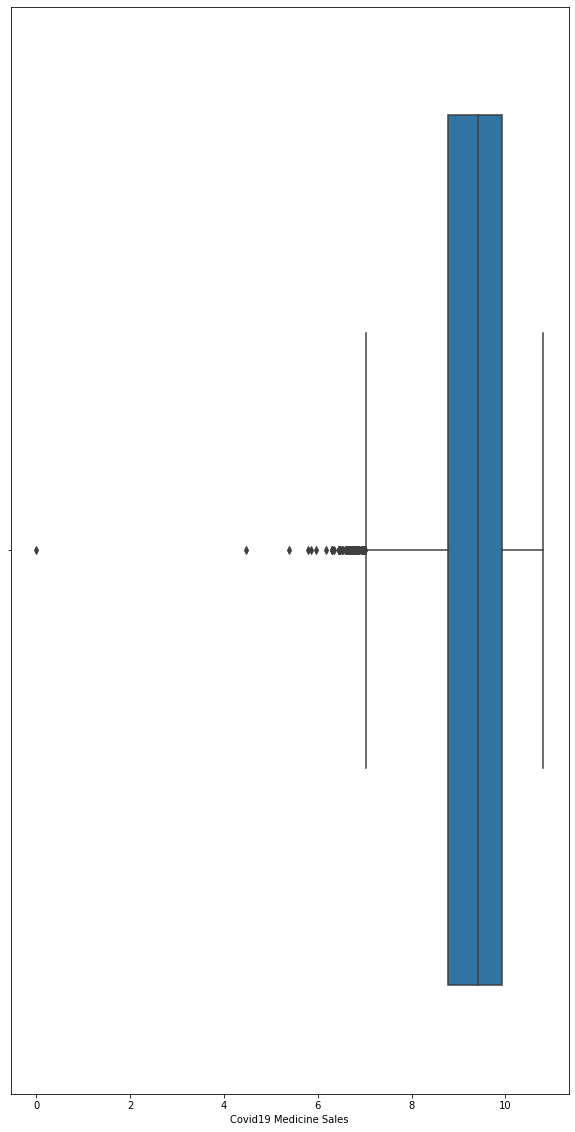

In [33]:
# Create the boxplot for 'Covid19 Medicine Sales'
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,20))
sns.boxplot(x=np.log(dfOT1["Covid19 Medicine Sales"]))
dfOT1['Covid19 Medicine Sales'].describe()


count    60940.000000
mean     14649.449163
std      11304.604259
min          0.000000
25%       6441.000000
50%      12362.000000
75%      20604.000000
max      49341.000000
Name: Covid19 Medicine Sales, dtype: float64

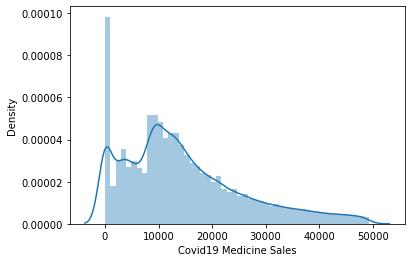

In [34]:
# continuous data to show the extent of data spread, identify outliers and data skewness 
sns.distplot(dfOT1['Covid19 Medicine Sales'],kde=True)

# describe only column 'Flight Distance'
dfOT1['Covid19 Medicine Sales'].describe()

In [35]:
# # Calculate the range, variance, and standard deviation
Covid_sale = dfOT1['Covid19 Medicine Sales']

Covid_sale_range =np.max(Covid_sale) - np.min(Covid_sale)
Covid_sale_variance = np.var(Covid_sale)
Covid_sale_std_deviation = np.std(Covid_sale)

print("Range:", Covid_sale_range)
print("Variance:", Covid_sale_variance)
print("Standard deviation:", Covid_sale_std_deviation)
print('Skewness:',dfOT1['Covid19 Medicine Sales'].skew())

Range: 49341
Variance: 127791980.4029472
Standard deviation: 11304.51150660422
Skewness: 0.9068302133291284


count    6.596800e+04
mean     6.891090e+04
std      2.569398e+05
min      0.000000e+00
25%      0.000000e+00
50%      8.892000e+03
75%      5.732475e+04
max      2.889398e+07
Name: Other Medicine Sales , dtype: float64

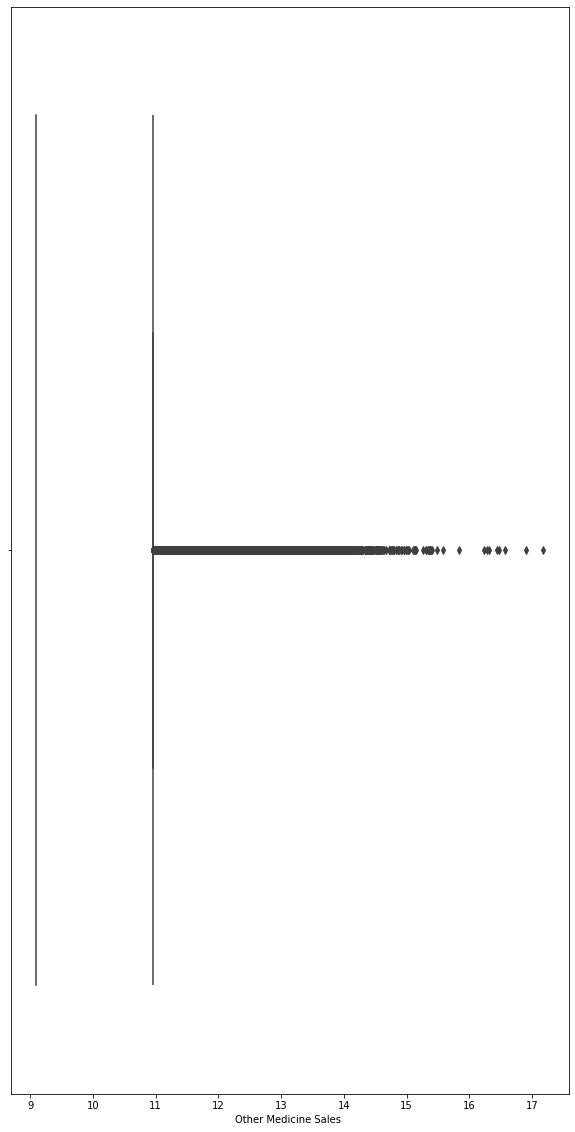

In [36]:
# Create the boxplot for 'Other Medicine Sales '
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,20))
sns.boxplot(x=np.log(df1["Other Medicine Sales "]))
df1['Other Medicine Sales '].describe()


count    6.596800e+04
mean     6.891090e+04
std      2.569398e+05
min      0.000000e+00
25%      0.000000e+00
50%      8.892000e+03
75%      5.732475e+04
max      2.889398e+07
Name: Other Medicine Sales , dtype: float64

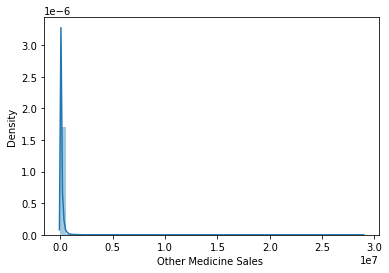

In [37]:
# continuous data to show the extent of data skewness 
sns.distplot(df1['Other Medicine Sales '],kde=True)

# describe only column 'Other Medicine Sales '
df1['Other Medicine Sales '].describe()

In [38]:
# Create the outliear for 'Other Medicine Sales'
Q1a = df1["Other Medicine Sales "].quantile(0.25)
Q3a = df1["Other Medicine Sales "].quantile(0.75)
IQRa = Q3a - Q1a #Finding the Inter Quartile Range

Lower_bound_1 = Q1a - 1.5*IQR
Upper_bound_1 = Q3a + 1.5*IQR

outliersA = df1[(df1["Other Medicine Sales "] < Lower_bound) | (df1["Other Medicine Sales "] > Upper_bound)]


outliersA

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
666,666057519,0,0,80854,No,24,2021-10-16,NaT,EMAIL PRESENT,blank
705,537411273,1,0,81656,No,24,2021-11-27,NaT,EMAIL PRESENT,female
936,119579349,1,11300,54286,No,18,2021-11-11,1978-10-20,EMAIL PRESENT,female
1705,304545172,0,0,62137,No,15,2021-11-23,NaT,NO EMAIL,blank
1949,836589971,1,2060,103822,No,25,2021-11-28,NaT,EMAIL PRESENT,female
...,...,...,...,...,...,...,...,...,...,...
65962,541897626,0,0,1082459,No,1,2021-04-11,NaT,NO EMAIL,blank
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank


In [39]:
# dfOT2 = df1[~outliers] Removing the outlier from data frame
dfOT2 = df1[(df1["Other Medicine Sales "] >= Lower_bound_1) & (df1["Other Medicine Sales "] <= Upper_bound_1)]
dfOT2

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65621,727453968,0,320584,0,No,1,2021-03-05,NaT,NO EMAIL,blank
65671,39751169,1,333456,0,No,1,2021-11-26,NaT,EMAIL PRESENT,male
65758,293047019,0,378699,0,No,1,2021-09-29,NaT,NO EMAIL,blank
65799,97153136,1,1625366,0,No,4,2021-07-03,1988-09-22,EMAIL PRESENT,female


In [40]:
Lower_bound_1

-25311.0

In [41]:
Upper_bound_1

82635.75

count    52840.000000
mean     13364.500322
std      20530.171212
min          0.000000
25%          0.000000
50%          0.000000
75%      20539.000000
max      82632.000000
Name: Other Medicine Sales , dtype: float64

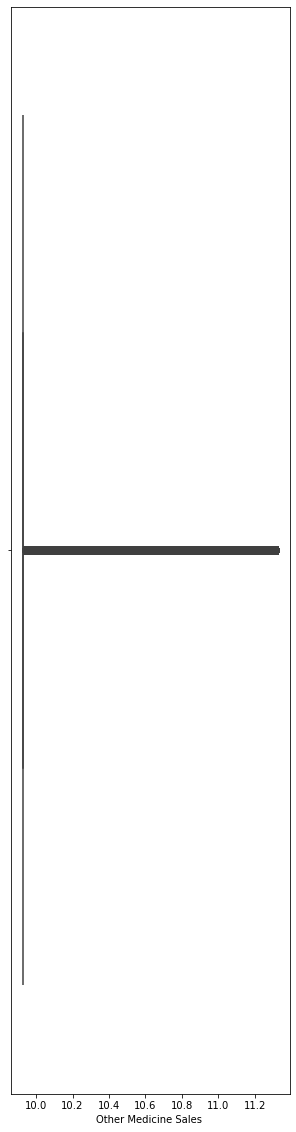

In [42]:
# Create the boxplot for 'Other Medicine Sales '
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,20))
sns.boxplot(x=np.log(dfOT2["Other Medicine Sales "]))
dfOT2['Other Medicine Sales '].describe()


In [43]:
#Removing the outlier from data frame with condition having 2000/- as bulk
dfOT3 = df1[(df1["Other Medicine Sales "] >= 2000) & (df1["Other Medicine Sales "] <= Upper_bound_1)]
dfOT3

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank
11,954549214,1,3036,7266,No,5,2021-09-11,NaT,EMAIL PRESENT,female
13,338982297,0,2429,9955,No,6,2021-11-27,NaT,NO EMAIL,blank
14,880796202,0,5878,4446,No,5,2021-05-14,NaT,EMAIL PRESENT,blank
16,785830164,1,1545,21189,No,11,2021-11-24,NaT,EMAIL PRESENT,female
...,...,...,...,...,...,...,...,...,...,...
63746,956127230,1,320096,4555,No,3,2021-10-16,NaT,EMAIL PRESENT,male
63873,550670101,0,151818,72656,No,2,2021-11-13,NaT,NO EMAIL,blank
64066,800612456,1,195487,44678,No,2,2021-11-09,NaT,EMAIL PRESENT,female
64537,3219424,1,1823462,17351,No,12,2021-11-28,1979-09-19,EMAIL PRESENT,female


count    23879.000000
mean     29569.795050
std      21296.327273
min       2050.000000
25%      11386.000000
50%      23640.000000
75%      43637.000000
max      82632.000000
Name: Other Medicine Sales , dtype: float64

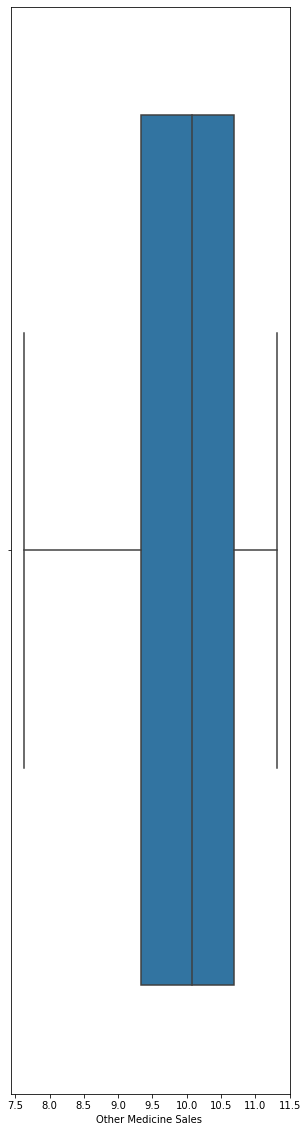

In [44]:
# Create the boxplot for 'Other Medicine Sales '
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,20))
sns.boxplot(x=np.log(dfOT3["Other Medicine Sales "]))
dfOT3['Other Medicine Sales '].describe()

count    23879.000000
mean     29569.795050
std      21296.327273
min       2050.000000
25%      11386.000000
50%      23640.000000
75%      43637.000000
max      82632.000000
Name: Other Medicine Sales , dtype: float64

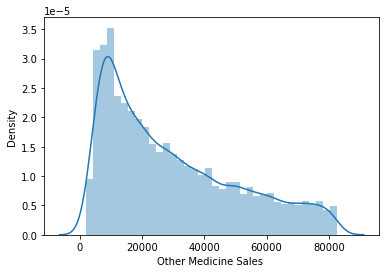

In [45]:
# continuous data to show the extent of data spread, identify outliers and data skewness 
sns.distplot(dfOT3['Other Medicine Sales '],kde=True)

# describe only column 'Flight Distance'
dfOT3['Other Medicine Sales '].describe()

In [46]:
# # Calculate the range, variance, and standard deviation
Other_sale = dfOT3['Other Medicine Sales ']

Other_sale_range =np.max(Other_sale) - np.min(Other_sale)
Other_sale_variance = np.var(Other_sale)
Other_sale_std_deviation = np.std(Other_sale)

print("Range:", Other_sale_range)
print("Variance:", Other_sale_variance)
print("Standard deviation:", Other_sale_std_deviation)
print('Skewness:',dfOT3['Other Medicine Sales '].skew())

Range: 80582
Variance: 453514562.3253493
Standard deviation: 21295.88134652683
Skewness: 0.776374551377053


###  Q2 Prepare countplot and pie plot of categorical data to check data balance of each of the columns.

In [47]:
df1   # Figure of Rs 2,000/ transaction to qualifies  58981 Customer_Id are eligible for bulk order

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank
65966,893585748,0,0,1713370,No,1,2021-09-27,NaT,NO EMAIL,blank


In [48]:
df1.describe(include='object')

,Redeemed points Flag,EMAIL Flag,Gender
count,65968,65968,65968
unique,2,2,3
top,No,NO EMAIL,blank
freq,65807,37203,48297


Gender,blank,female,male,All
Gender,,,,
blank,73.21%,0.00%,0.00%,73.21%
female,0.00%,21.07%,0.00%,21.07%
male,0.00%,0.00%,5.72%,5.72%
All,73.21%,21.07%,5.72%,100.00%


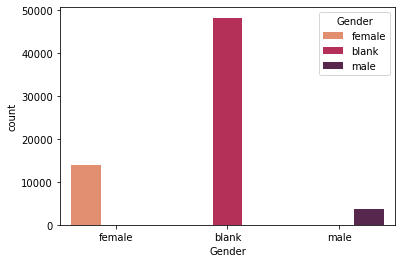

In [49]:
# categorical data to check countplot data balance of each of the 'Gender'.
sns.countplot(data=df1, x='Gender', hue='Gender', palette = "rocket_r")

#It will show the count
G1 = pd.crosstab(df1['Gender'], df1['Gender'],margins = True,normalize = True).style.format('{:.2%}')
G1

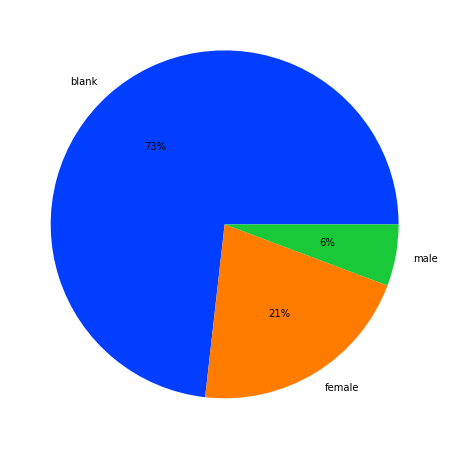

In [50]:

# #create pie chart
Gender1 = df1.Gender.value_counts(normalize=True)
labels = Gender1.index.tolist()

plt.figure(figsize=(15, 8))
colors = sns.color_palette('bright')[0:5]
plt.pie(Gender1, colors=colors, autopct='%.0f%%', labels=labels)
plt.show()

EMAIL Flag,EMAIL PRESENT,NO EMAIL,All
EMAIL Flag,,,
EMAIL PRESENT,43.60%,0.00%,43.60%
NO EMAIL,0.00%,56.40%,56.40%
All,43.60%,56.40%,100.00%


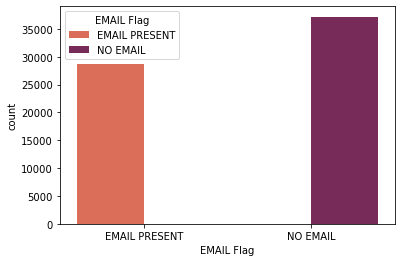

In [51]:
# categorical data to check countplot data balance of each of the 'EMAIL Flag'.
sns.countplot(data=df1, x='EMAIL Flag', hue='EMAIL Flag', palette = "rocket_r")

#It will show the count
EMAIL_Flag = pd.crosstab(df1['EMAIL Flag'], df1['EMAIL Flag'],margins = True,normalize = True).style.format('{:.2%}')
EMAIL_Flag

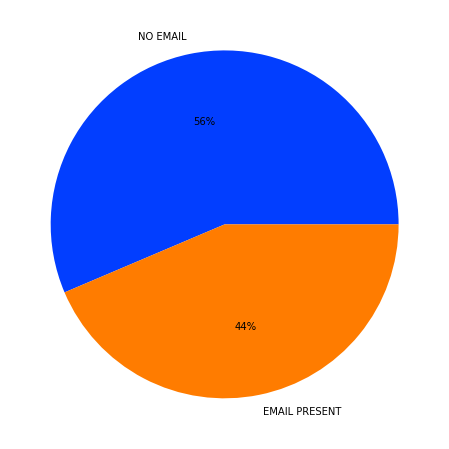

In [52]:
# #create pie chart
EMAIL_Flag_1 = df1['EMAIL Flag'].value_counts(normalize=True)
labels = EMAIL_Flag_1.index.tolist()

plt.figure(figsize=(15, 8))
colors = sns.color_palette('bright')[0:5]
plt.pie(EMAIL_Flag_1, colors=colors, autopct='%.0f%%', labels=labels)
plt.show()

## Bivariate Analysis of Data:

### Q3 Derive the Total Sales column (covid19 medicine sales + other medicines sales) and perform bivariate analysis

In [53]:
df1

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank
...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank
65966,893585748,0,0,1713370,No,1,2021-09-27,NaT,NO EMAIL,blank


In [54]:
df1.describe()

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Transactions
count,6.596800e+04,65968.000000,6.596800e+04,6.596800e+04,65968.000000
mean,4.581555e+08,0.251031,2.039726e+04,6.891090e+04,3.505866
std,3.041646e+08,0.433609,3.885862e+04,2.569398e+05,3.909522
min,8.946000e+03,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,1.750585e+08,0.000000,7.157000e+03,0.000000e+00,2.000000
50%,4.507221e+08,0.000000,1.333800e+04,8.892000e+03,2.000000
75%,7.231109e+08,1.000000,2.403100e+04,5.732475e+04,4.000000
max,1.161100e+09,1.000000,5.146615e+06,2.889398e+07,268.000000


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65968 entries, 0 to 65967
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer id             65968 non-null  int64         
 1   App User                65968 non-null  int64         
 2   Covid19 Medicine Sales  65968 non-null  int32         
 3   Other Medicine Sales    65968 non-null  int32         
 4   Redeemed points Flag    65968 non-null  object        
 5   Transactions            65968 non-null  int64         
 6   last transaction date   65968 non-null  datetime64[ns]
 7   DOB                     2358 non-null   datetime64[ns]
 8   EMAIL Flag              65968 non-null  object        
 9   Gender                  65968 non-null  object        
dtypes: datetime64[ns](2), int32(2), int64(3), object(3)
memory usage: 7.0+ MB


In [56]:
df2=df1
df2['Total Sales column']=df1[['Covid19 Medicine Sales','Other Medicine Sales ']].sum(axis=1)

# df2['Average Sales column']=df1[['Covid19 Medicine Sales', 'Other Medicine Sales ']].mean(axis=1)
# df2.drop('Average Sales column', axis=1, inplace=True)
df2

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender,Total Sales column
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female,22035
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank,8025
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank,8031
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank,8046
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank,8046
...,...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank,1114341
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank,1249095
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank,1496487
65966,893585748,0,0,1713370,No,1,2021-09-27,NaT,NO EMAIL,blank,1713370


In [57]:
df2['Average Sales column']=df1[['Covid19 Medicine Sales', 'Other Medicine Sales ']].mean(axis=1)
df2

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender,Total Sales column,Average Sales column
0,863268612,1,22035,0,No,11,2021-12-11,NaT,EMAIL PRESENT,female,22035,11017.5
1,389739561,0,3926,4099,No,4,2021-11-25,NaT,NO EMAIL,blank,8025,4012.5
2,446950605,0,8031,0,No,4,2021-11-10,NaT,NO EMAIL,blank,8031,4015.5
3,819143842,0,8046,0,No,4,2021-06-28,NaT,NO EMAIL,blank,8046,4023.0
4,530569572,0,8046,0,No,4,2021-11-18,NaT,NO EMAIL,blank,8046,4023.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65963,848749306,0,0,1114341,No,1,2021-12-09,NaT,EMAIL PRESENT,blank,1114341,557170.5
65964,682210238,0,0,1249095,No,1,2021-11-19,NaT,NO EMAIL,blank,1249095,624547.5
65965,645430745,0,0,1496487,No,1,2021-06-09,NaT,NO EMAIL,blank,1496487,748243.5
65966,893585748,0,0,1713370,No,1,2021-09-27,NaT,NO EMAIL,blank,1713370,856685.0


### Q4 For categorical columns: Show class wise distribution of total sales and average sales 

In [58]:
sales_by_class = df2.groupby('Gender').agg(total_sales=('Total Sales column', 'sum'), average_sales=('Total Sales column', 'mean'))
print(sales_by_class)

        total_sales  average_sales
Gender                            
blank    3264334971   67588.773029
female   2038825070  146688.615728
male      588320628  155970.474019


In [59]:
sales_by_class

,total_sales,average_sales
Gender,,
blank,3264334971,67588.773029
female,2038825070,146688.615728
male,588320628,155970.474019


<AxesSubplot:xlabel='Gender', ylabel='Total Sales column'>

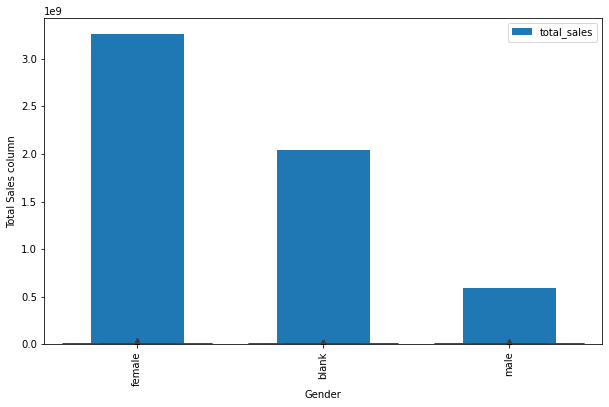

In [60]:
# Bar plot of total sales by class
sales_by_class.plot(kind='bar', y='total_sales', figsize=(10, 6))

# # Box plot of average sales by class
sns.boxplot(x='Gender', y='Total Sales column', data=df2)

In [61]:
sales_by_class = sales_by_class.reset_index()

In [62]:
sales_by_class.drop('index',axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [ ]:
sales_by_class

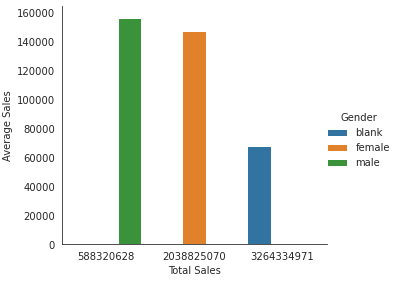

In [63]:
with sns.axes_style('white'):
    g = sns.catplot(data=sales_by_class, x='total_sales', y='average_sales', hue='Gender', kind='bar',  height=4, aspect=1.2)
    g.set_axis_labels('Total Sales', 'Average Sales')

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(data=df2, x='Total Sales column', y='Average Sales column', hue='Redeemed points Flag ', kind='bar',  height=4, aspect=1.2)
    g.set_axis_labels('Total Sales', 'Average Sales')

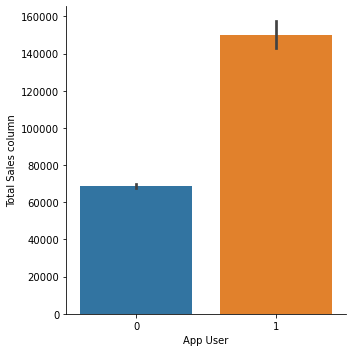

In [64]:
sns.catplot(x="App User", y="Total Sales column", data=df2, kind="bar")

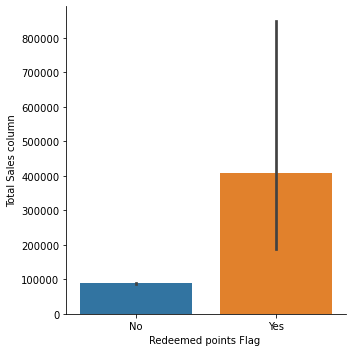

In [65]:
sns.catplot(x='Redeemed points Flag ', y="Total Sales column", data=df2, kind="bar")

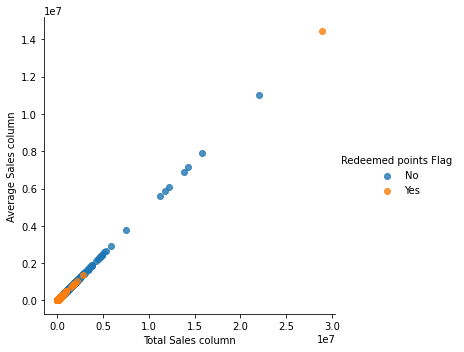

In [66]:
sns.lmplot(x='Total Sales column',y='Average Sales column',hue='Redeemed points Flag ',data=df2,fit_reg=False)

In [ ]:
sns.pairplot(hue='Gender',data=df2)

### Q5 For continuous columns, show the scatterplot that highlights relationship between both the variables

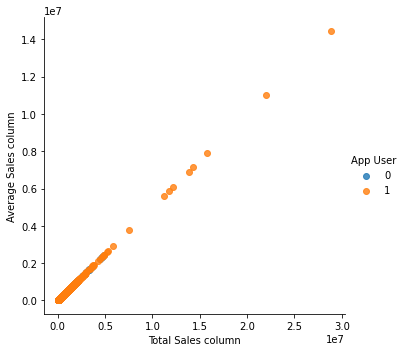

In [67]:
sns.lmplot(x='Total Sales column',y='Average Sales column',hue='App User',data=df2,fit_reg=False)

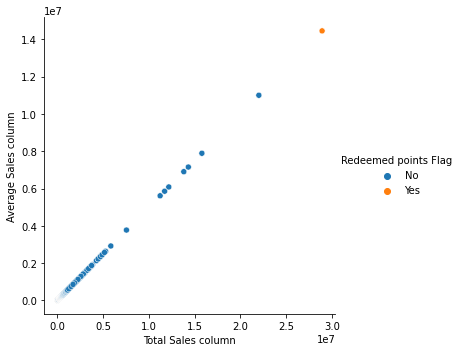

In [68]:
sns.relplot(x='Total Sales column',y='Average Sales column',hue='Redeemed points Flag ',data=df2)

In [ ]:
sns.relplot(x='Covid19 Medicine Sales',y='Average Sales column',hue='App User',data=df2)

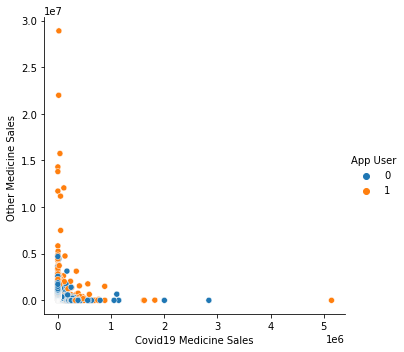

In [69]:
sns.relplot(x='Covid19 Medicine Sales',y='Other Medicine Sales ',hue='App User',data=df2)

## Multivariate Analysis of Data:

###	Q6 Perform multivariate analysis with a heatmap. This should show the intervariable dependencies and correlations.

In [ ]:
df2.describe()

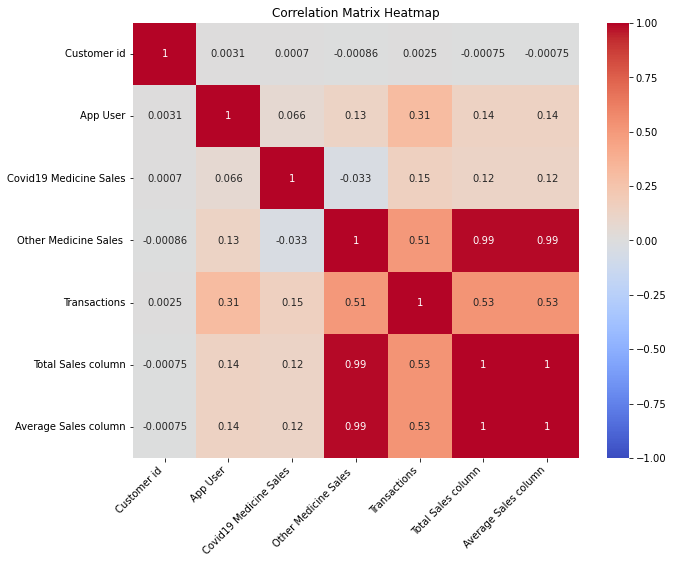

In [70]:
# Create the Multivariate analysis using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Conclusion